In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import warnings
warnings.filterwarnings("ignore")
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.vision import *

In [4]:
torch.cuda.is_available()

True

In [5]:
PATH = Path("/home/ubuntu/data")

In [6]:
df = pd.read_csv(PATH/"train.csv")

In [7]:
len(df)

196299

In [8]:
is_animal = df.category_id > 0 #removing null class from dataset

In [9]:
new_class = is_animal.values.astype(int)

In [10]:
train_df = df[["category_id", "file_name"]]

In [11]:
train_df["label"] = new_class

In [12]:
train_df.tail()

,category_id,file_name,label
196294,0,597b495c-23d2-11e8-a6a3-ec086b02610b.jpg,0
196295,0,594e7621-23d2-11e8-a6a3-ec086b02610b.jpg,0
196296,4,596d6468-23d2-11e8-a6a3-ec086b02610b.jpg,1
196297,0,58f5b062-23d2-11e8-a6a3-ec086b02610b.jpg,0
196298,0,589e668f-23d2-11e8-a6a3-ec086b02610b.jpg,0


In [13]:
train_df_final = train_df[["file_name","label"]]

In [14]:
train_df_final.columns = ['name', 'label']

In [15]:
train_df_final.head()

,name,label
0,5998cfa4-23d2-11e8-a6a3-ec086b02610b.jpg,1
1,588a679f-23d2-11e8-a6a3-ec086b02610b.jpg,1
2,59279ce3-23d2-11e8-a6a3-ec086b02610b.jpg,0
3,5a2af4ab-23d2-11e8-a6a3-ec086b02610b.jpg,0
4,599fbd89-23d2-11e8-a6a3-ec086b02610b.jpg,0


In [16]:
trans = get_transforms(max_zoom=1)

In [17]:
data = ImageDataBunch.from_df(PATH, train_df_final, "train", size=448, bs=128, ds_tfms=trans)

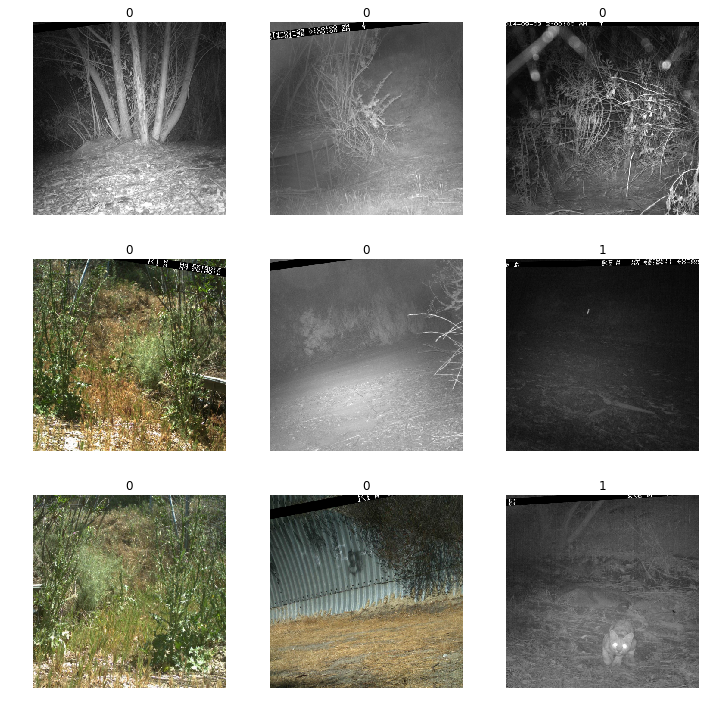

In [18]:
data.show_batch(rows=3, figsize=(10,10))

In [19]:
from fastai.metrics import error_rate, accuracy
from fastai.vision import models 
from fastai.vision import learner

In [20]:
learn = learner.create_cnn(data, models.resnet34, metrics=[error_rate,accuracy]).to_fp16() 

In [20]:
# learn.lr_find()

In [21]:
# learn.recorder.plot()

In [ ]:
# learn.fit_one_cycle(2, 1e-2)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.141883,0.162649,0.067322,0.932678,1:18:57
1,0.122594,0.120823,0.051606,0.948394,1:17:21
2,0.100420,0.085595,0.033470,0.966530,1:17:14


In [ ]:
# learn.save("animal_detectort2")

In [ ]:
# learn.fit_one_cycle(2, 1e-2)

In [21]:
learn.load("animal_detectort2")

Learner(data=ImageDataBunch;

Train: LabelList (157040 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
1,1,0,1,1
Path: /home/ubuntu/data;

Valid: LabelList (39259 items)
x: ImageList
Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448),Image (3, 448, 448)
y: CategoryList
0,0,0,1,0
Path: /home/ubuntu/data;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

## Train Predictions

In [21]:
from fastai.vision import ImageImageList
test_data = ImageImageList.from_df(df, PATH/"train", cols="file_name")
learn.data.add_test(test_data)

In [23]:
torch.cuda.is_available()

False

In [22]:
preds, y = learn.get_preds(ds_type=DatasetType.Test)

RuntimeError: _thnn_conv2d_forward not supported on CPUType for Half

In [ ]:
np.save("is_animal_train-res50", preds)

## Test Predictions

In [23]:
from fastai.vision import ImageImageList
df_test = pd.read_csv(PATH/"test.csv")
test_data = ImageImageList.from_df(df_test, PATH/'test', cols="file_name")
learn.data.add_test(test_data)
preds, y = learn.get_preds(ds_type=DatasetType.Test)

In [25]:
np.save(PATHHHHH/"test-is-animal-res50", preds)